In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests as requests
import time


In [74]:
data = pd.read_csv(r'C:\Users\pabli\Desktop\Health-Database\data\full_data2.csv')

In [75]:
data.shape

(3580, 2330)

In [45]:
def check_nan(data: pd.DataFrame) -> None:
    
    nan_cols=data.isna().mean() * 100  # el porcentaje
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

    sns.heatmap(data.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show()

In [219]:
nan_cols=data.isna().mean() * 100

In [220]:
nan_cols

Unnamed: 0.2                                                                0.00000
Unnamed: 0.1                                                                0.00000
Unnamed: 0                                                                  0.00000
country                                                                     0.00000
country_code                                                                0.00000
                                                                             ...   
Mean Non-HDL cholesterol, age-standardized                                  4.28737
Number of non-pregnant women (aged 15-49 years) with anaemia (thousands)    0.00000
Prevalence of anaemia in pregnant women (aged 15-49) (%)                    0.00000
Mean hemoglobin level of non-pregnant women (aged 15-49 years)              0.00000
num_nan                                                                     0.00000
Length: 178, dtype: float64

In [149]:
data.drop(columns=nan_cols[nan_cols>40].index, inplace=True)

In [150]:
data.shape

(3540, 190)

In [153]:
nan_cols[nan_cols>40].index

Index([], dtype='object')

In [79]:
list1= ['Reported number of children receiving antiretroviral therapy','Estimated number of pregnant women living with HIV needing antiretrovirals for preventing mother-to-child transmission',
       'Estimated number of children needing antiretroviral therapy based on WHO methods',
       'Estimated antiretroviral therapy coverage among children','Nursing and midwifery personnel  (number)',
       'Nursing personnel (number)','Pharmacists  (number)','Concentrations of fine particulate matter (PM2.5)',
       'New cases tested for RR-/MDR-TB (%)',
       'Previously treated cases tested for RR-/MDR-TB (%)',
       'Treatment success rate for patients treated for MDR-TB (%)',
       'Cases started on MDR-TB treatment',
       'Total number of notified TB cases',
       'HIV-positive TB patients on ART (antiretroviral therapy) (%)',
       'TB patients with known HIV status (%)',
       'Tested TB patients HIV-positive (%)',
       'New or unknown treatment history cases: Pulmonary, bacteriologically confirmed',
       'New cases: pulmonary smear-negative',
       'New cases: Pulmonary, smear-negative/unknown/not done and other new cases',
       'New cases: Pulmonary, smear-positive',
       'New cases: pulmonary smear unknown/not done',
       'Retreatment cases: other', 'Relapse cases (pre-2013 definition)',
       'Retreatment cases: treatment after default (pulmonary smear and/or culture positive)',
       'Retreatment cases: treatment after failure (pulmonary smear and/or culture positive)',
       'Confirmed cases of RR-/MDR-TB','Congenital Rubella Syndrome - number of reported cases',
       'Neonates protected at birth against neonatal tetanus (PAB) (%)','Low birth weight (in thousands)','Best-practice policy implemented for industrially produced trans-fatty acids (TFA) (Y/N)',
       'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate)_x','Proportion of population with primary reliance on fuels and technologies for cooking, by fuel type (%)',
       'Overweight prevalence among children under 5 years of age (% weight-for-height >+2 SD), model-based estimates',
       'Stunting prevalence among children under 5 years of age (% height-for-age <-2 SD), model-based estimates']

In [80]:
list1 = set(list1)

In [81]:
list1 = list(list1)

In [82]:
data.drop(columns=list1, inplace=True)

In [83]:
len(list1)

34

In [88]:
data.columns[:50]

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'country', 'country_code',
       'year', 'Meningitis', 'Alzheimer's Disease and Other Dementias',
       'Parkinson's Disease', 'Nutritional Deficiencies', 'Malaria',
       'Drowning', 'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'population',
       'per_capita-Meningitis',
       'per_capita-Alzheimer's Disease 

In [89]:
list2 = ['Prevalence of underweight among adults, BMI < 18 (crude estimate) (%)','Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)','Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%)','Mean BMI (kg/m&#xb2;) (crude estimate)',
       'Prevalence of thinness among children and adolescents, BMI < -2 standard deviations below the median (crude estimate) (%)',
       'Prevalence of overweight among children and adolescents, BMI > +1 standard deviations above the median (crude estimate) (%)',
       'Prevalence of obesity among children and adolescents, BMI > +2 standard deviations above the median (crude estimate) (%)',
        'Raised fasting blood glucose (>= 7.0 mmol/L) (crude estimate)',
        'Reported number of people requiring interventions against NTDs',
       'Treatment success rate: previously treated TB cases',
        'Previously treated  cases, excluding relapse',
       'Tuberculosis - new and relapse cases_y',
        'BCG immunization coverage among 1-year-olds (%)',]

In [90]:
data.drop(columns=list2, inplace=True)

In [96]:
list3 = ['Mean systolic blood pressure (crude estimate)_x','Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate)_y','Mean systolic blood pressure (crude estimate)_y','External health expenditure (EXT) per capita in US$',
        'External health expenditure (EXT) as percentage of current health expenditure (CHE) (%)',
        'Reported number of people receiving antiretroviral therapy',
        'Number of new HIV infections','Dentists (number)','Smear-positive tuberculosis treatment-success rate (%)',
         'Distribution of causes of death among children aged < 5 years (%)',
         'Number of maternal deaths','Mean fasting blood glucose (mmol/l) (crude estimate)','Premature deaths due to noncommunicable diseases (NCD) as a proportion of all NCD deaths',
        'Number of deaths attributed to non-communicable diseases, by type of disease and sex',
        'Treatment success rate: new TB cases',
        'Incidence of tuberculosis (per 100 000 population) (HIV-positive cases)',
        'Number of incident tuberculosis cases,  (HIV-positive cases)','Mean HDL cholesterol, crude',
         'Mean Non-HDL cholesterol, crude',
        ]

In [97]:
data.drop(columns=list3, inplace=True)

In [110]:
data.shape


(3580, 205)

'N nan cols: 128'

Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_x                         21.787709
Mean systolic blood pressure (age-standardized estimate)_x                                        21.787709
Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_y                         21.787709
Mean systolic blood pressure (age-standardized estimate)_y                                        21.787709
Mortality rate for 5-14 year-olds (probability of dying per 1000 children aged 5-14 years)         1.117318
                                                                                                    ...    
Proportion of population with primary reliance on clean fuels and technologies for cooking (%)     2.793296
Mean Non-HDL cholesterol, age-standardized                                                         6.592179
Number of non-pregnant women (aged 15-49 years) with anaemia (thousands)                           1.117318
Prevalence of anaemia in pre

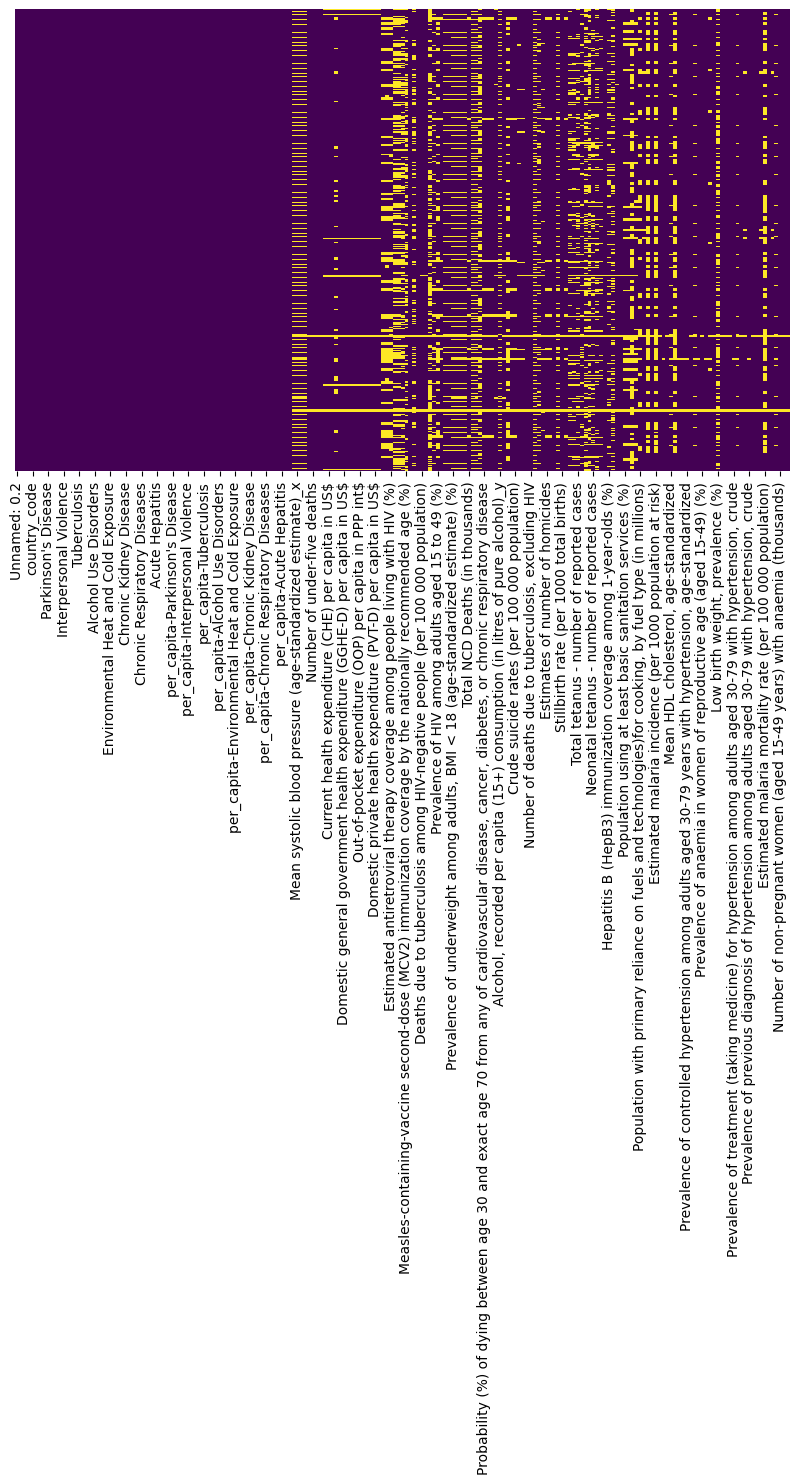

In [118]:
check_nan(data)

In [265]:
data['num_nan']=[sum([pd.isna(e) for e in fila]) for fila in data.itertuples()]

In [266]:
data["num_nan"].value_counts()

0    2617
1     238
2     186
4      51
3      44
9       5
5       4
6       2
7       1
8       1
Name: num_nan, dtype: int64

In [136]:
data[data.num_nan>116].index

Int64Index([2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530,
            2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 3100, 3101,
            3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112,
            3113, 3114, 3115, 3116, 3117, 3118, 3119],
           dtype='int64')

In [143]:
data.loc[2538]

Unnamed: 0.2                                                                       2538
Unnamed: 0.1                                                                       2538
Unnamed: 0                                                                         2538
country                                                                     Puerto Rico
country_code                                                                        PRI
                                                                               ...     
Mean Non-HDL cholesterol, age-standardized                                          NaN
Number of non-pregnant women (aged 15-49 years) with anaemia (thousands)            NaN
Prevalence of anaemia in pregnant women (aged 15-49) (%)                            NaN
Mean hemoglobin level of non-pregnant women (aged 15-49 years)                      NaN
num_nan                                                                             120
Name: 2538, Length: 200, dtype: 

In [144]:
data.drop(data[data.num_nan>=116].index, axis=0, inplace=True)

'N nan cols: 94'

Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_x                             20.903955
Mean systolic blood pressure (age-standardized estimate)_x                                            20.903955
Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_y                             20.903955
Mean systolic blood pressure (age-standardized estimate)_y                                            20.903955
Current health expenditure (CHE) per capita in PPP int$                                                1.864407
                                                                                                        ...    
Proportion of population with primary reliance on polluting fuels and technologies for cooking (%)     1.694915
Prevalence of previous diagnosis of hypertension among adults aged 30-79 with hypertension, crude      0.564972
Population with primary reliance on clean fuels and technologies for cooking (in millions)             1

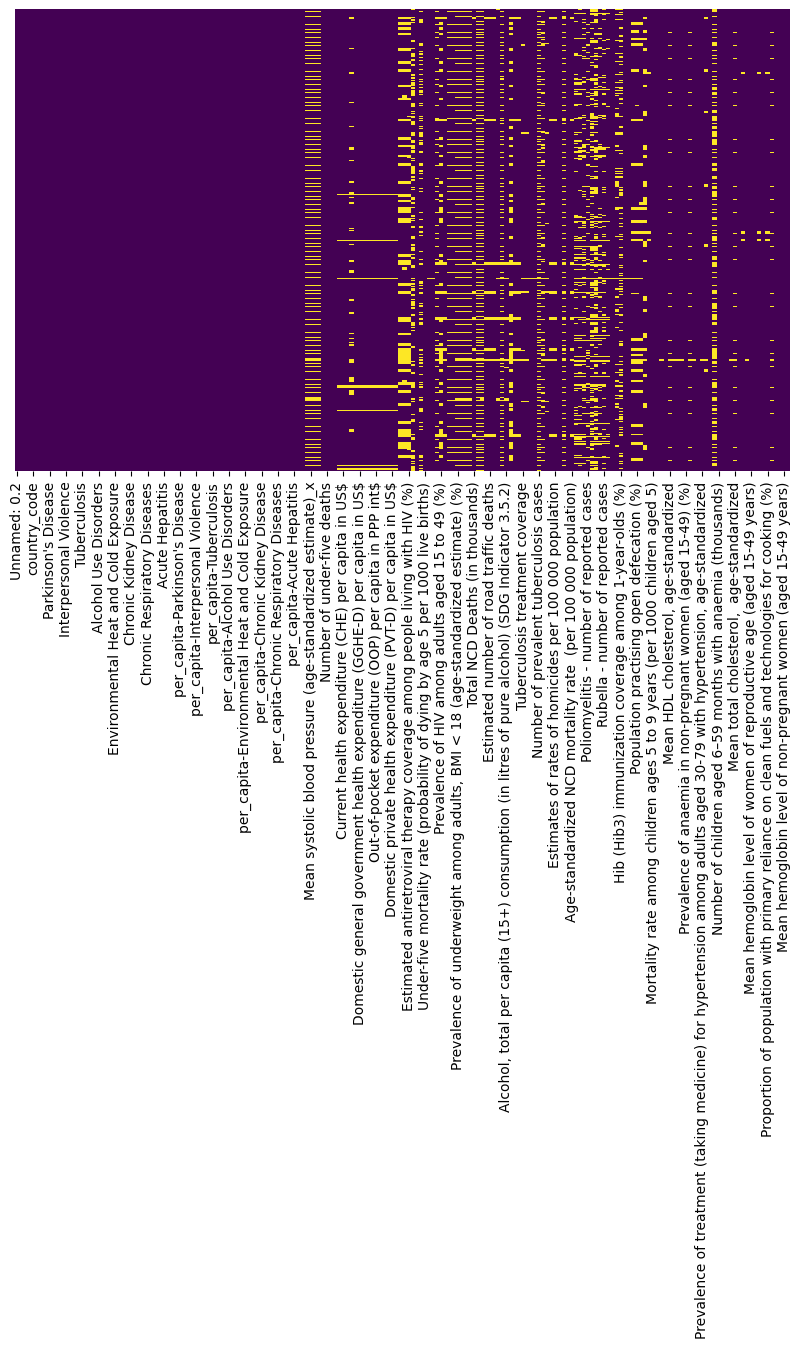

In [154]:
check_nan(data)

In [155]:
data.shape

(3540, 190)

In [180]:
nan_cols[nan_cols>20].index

Index(['Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_x',
       'Mean systolic blood pressure (age-standardized estimate)_x',
       'Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_y',
       'Mean systolic blood pressure (age-standardized estimate)_y',
       'Estimated number of people (all ages) living with HIV',
       'Number of people dying from HIV-related causes',
       'Estimated antiretroviral therapy coverage among people living with HIV (%)',
       'Measles-containing-vaccine second-dose (MCV2) immunization coverage by the nationally recommended age (%)',
       'Adolescent birth rate (per 1000 women aged 15-19 years)',
       'Prevalence of HIV among adults aged 15 to 49 (%)',
       'Mean fasting blood glucose (mmol/l) (age-standardized estimate)',
       'Raised fasting blood glucose (>=7.0 mmol/L) (age-standardized estimate)',
       'New HIV infections (per 1000 uninfected population)',
       'Number of prevalent t

In [185]:

data[data['Mumps - number of reported cases'].isna()==False]['Mumps - number of reported cases']

10         0.0
13         0.0
14         0.0
16        29.0
20      1651.0
         ...  
3575       0.0
3576      14.0
3577      18.0
3578       2.0
3579       8.0
Name: Mumps - number of reported cases, Length: 2200, dtype: float64

In [169]:
data[data["Yellow fever - number of reported cases"]> 0]["Yellow fever - number of reported cases"][:20]

C:\Users\pabli\AppData\Local\Temp\ipykernel_4976\43288909.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data[data["Yellow fever - number of reported cases"]> 0]["Yellow fever - number of reported cases"][:20]


95       3.0
96     881.0
128      8.0
138      7.0
301      1.0
340     10.0
343     57.0
344     31.0
380      8.0
381      4.0
382     15.0
383      6.0
384     13.0
385     16.0
386     16.0
387      6.0
388      1.0
390      3.0
391      2.0
392      3.0
Name: Yellow fever - number of reported cases, dtype: float64

In [172]:
data["Yellow fever - number of reported cases"].info()

<class 'pandas.core.series.Series'>
Int64Index: 3540 entries, 0 to 3579
Series name: Yellow fever - number of reported cases
Non-Null Count  Dtype  
--------------  -----  
3540 non-null   float64
dtypes: float64(1)
memory usage: 55.3 KB


In [171]:
data["Yellow fever - number of reported cases"].fillna(0.0,inplace=True)

In [186]:
data['Mumps - number of reported cases'].fillna(0.0,inplace=True)

'N nan cols: 92'

Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_x                             20.903955
Mean systolic blood pressure (age-standardized estimate)_x                                            20.903955
Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_y                             20.903955
Mean systolic blood pressure (age-standardized estimate)_y                                            20.903955
Current health expenditure (CHE) per capita in PPP int$                                                1.864407
                                                                                                        ...    
Proportion of population with primary reliance on polluting fuels and technologies for cooking (%)     1.694915
Prevalence of previous diagnosis of hypertension among adults aged 30-79 with hypertension, crude      0.564972
Population with primary reliance on clean fuels and technologies for cooking (in millions)             1

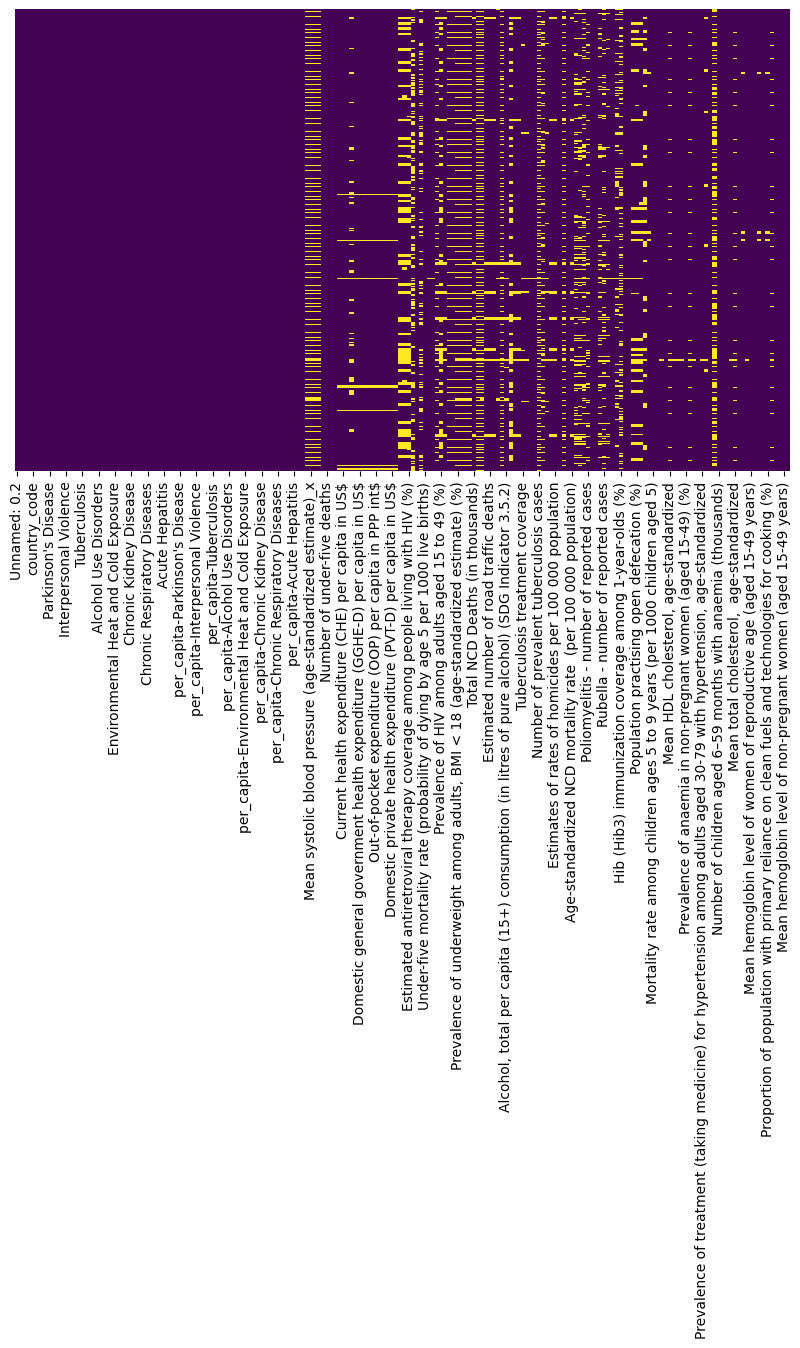

In [187]:
check_nan(data)

In [190]:
data[data.num_nan>40]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,country,country_code,year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,...,Mean hemoglobin level of women of reproductive age (aged 15-49 years),Number of deaths among children ages 5 to 9 years,Population with primary reliance on clean fuels and technologies for cooking (in millions),Mortality rate among children ages 10 to 14 years (per 1000 children aged 10),Proportion of population with primary reliance on clean fuels and technologies for cooking (%),"Mean Non-HDL cholesterol, age-standardized",Number of non-pregnant women (aged 15-49 years) with anaemia (thousands),Prevalence of anaemia in pregnant women (aged 15-49) (%),Mean hemoglobin level of non-pregnant women (aged 15-49 years),num_nan
39,39,39,39,Albania,ALB,2019,13.0,917.0,248.0,5.0,...,127.0,31.0,1660.62653,1.06092,92.3,NaN,162.00,24.5,127.0,45
77,77,77,77,Andorra,AND,2017,0.0,35.0,7.0,0.0,...,131.0,0.0,67.84500,0.43412,100.0,3.6,2.08,16.5,132.0,42
78,78,78,78,Andorra,AND,2018,0.0,36.0,7.0,0.0,...,131.0,0.0,67.76600,0.41509,100.0,3.6,2.09,16.6,132.0,45
79,79,79,79,Andorra,AND,2019,0.0,36.0,7.0,0.0,...,131.0,0.0,67.81100,0.39756,100.0,NaN,2.10,16.8,131.0,51
119,119,119,119,Antigua and Barbuda,ATG,2019,1.0,16.0,5.0,3.0,...,130.0,1.0,25.50700,0.95863,100.0,NaN,4.29,19.4,131.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,3317,3317,3317,Tuvalu,TUV,2017,0.0,2.0,1.0,0.0,...,126.0,1.0,6.17674,2.33863,89.7,3.5,0.69,34.0,127.0,48
3318,3318,3318,3318,Tuvalu,TUV,2018,0.0,2.0,1.0,0.0,...,126.0,1.0,6.40118,2.28231,90.9,3.4,0.70,34.0,127.0,50
3319,3319,3319,3319,Tuvalu,TUV,2019,0.0,2.0,1.0,0.0,...,126.0,1.0,6.61864,2.22589,91.9,NaN,0.73,34.0,127.0,54
3538,3538,3538,3538,Yemen,YEM,2018,482.0,1687.0,401.0,1013.0,...,112.0,3245.0,9927.75862,2.79283,93.7,3.4,4110.00,57.6,113.0,41


In [270]:
data[data.num_nan>6].index

Int64Index([1761, 1770, 2760, 2761, 2762, 2763, 2764], dtype='int64')

In [271]:
data.loc[2760]

Unnamed: 0.2                                                                  2760
Unnamed: 0.1                                                                  2760
Unnamed: 0                                                                    2760
country                                                                     Serbia
country_code                                                                   SRB
                                                                             ...  
Mean Non-HDL cholesterol, age-standardized                                     4.2
Number of non-pregnant women (aged 15-49 years) with anaemia (thousands)     535.0
Prevalence of anaemia in pregnant women (aged 15-49) (%)                      28.4
Mean hemoglobin level of non-pregnant women (aged 15-49 years)               128.0
num_nan                                                                          9
Name: 2760, Length: 154, dtype: object

In [199]:
data.drop(data[data.num_nan>=40].index, axis=0, inplace=True)

In [200]:
data.shape

(3452, 190)

In [307]:
data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,country,country_code,year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,...,"Prevalence of previous diagnosis of hypertension among adults aged 30-79 with hypertension, crude",Mean hemoglobin level of women of reproductive age (aged 15-49 years),Number of deaths among children ages 5 to 9 years,Mortality rate among children ages 10 to 14 years (per 1000 children aged 10),Proportion of population with primary reliance on clean fuels and technologies for cooking (%),"Mean Non-HDL cholesterol, age-standardized",Number of non-pregnant women (aged 15-49 years) with anaemia (thousands),Prevalence of anaemia in pregnant women (aged 15-49) (%),Mean hemoglobin level of non-pregnant women (aged 15-49 years),num_nan
2,2,2,2,Afghanistan,AFG,2002,2990.0,1311.0,429.0,2795.0,...,28.2,123.0,4420.0,4.67688,37.4,3.1,1360.0,43.4,125.0,1
3,3,3,3,Afghanistan,AFG,2003,3300.0,1326.0,434.0,3039.0,...,28.9,123.0,4532.0,4.55469,41.8,3.1,1440.0,42.9,124.0,1
4,4,4,4,Afghanistan,AFG,2004,3350.0,1344.0,439.0,3033.0,...,29.6,123.0,4676.0,4.47444,46.7,3.1,1530.0,42.4,124.0,1
5,5,5,5,Afghanistan,AFG,2005,3238.0,1362.0,442.0,2879.0,...,30.3,123.0,4821.0,4.43099,51.1,3.1,1620.0,41.9,124.0,0
6,6,6,6,Afghanistan,AFG,2006,3098.0,1381.0,446.0,2727.0,...,31.1,123.0,5047.0,4.44194,55.9,3.1,1690.0,41.4,124.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,3573,3573,3573,Zimbabwe,ZWE,2013,1448.0,731.0,209.0,3017.0,...,28.5,126.0,2494.0,8.04556,80.3,2.9,934.0,32.9,127.0,0
3574,3574,3574,3574,Zimbabwe,ZWE,2014,1422.0,741.0,212.0,2977.0,...,29.3,126.0,2363.0,8.32632,79.7,2.9,941.0,32.7,127.0,0
3575,3575,3575,3575,Zimbabwe,ZWE,2015,1439.0,754.0,215.0,3019.0,...,30.2,126.0,2229.0,8.60679,79.6,2.9,950.0,32.4,127.0,0
3576,3576,3576,3576,Zimbabwe,ZWE,2016,1457.0,767.0,219.0,3056.0,...,31.0,126.0,2094.0,8.84993,79.3,2.9,959.0,32.2,127.0,0


'N nan cols: 82'

Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_x                             19.293163
Mean systolic blood pressure (age-standardized estimate)_x                                            19.293163
Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_y                             19.293163
Mean systolic blood pressure (age-standardized estimate)_y                                            19.293163
Current health expenditure (CHE) per capita in PPP int$                                                1.361530
                                                                                                        ...    
Mean total cholesterol,  age-standardized                                                              4.287370
Proportion of population with primary reliance on polluting fuels and technologies for cooking (%)     1.593279
Population with primary reliance on clean fuels and technologies for cooking (in millions)             1

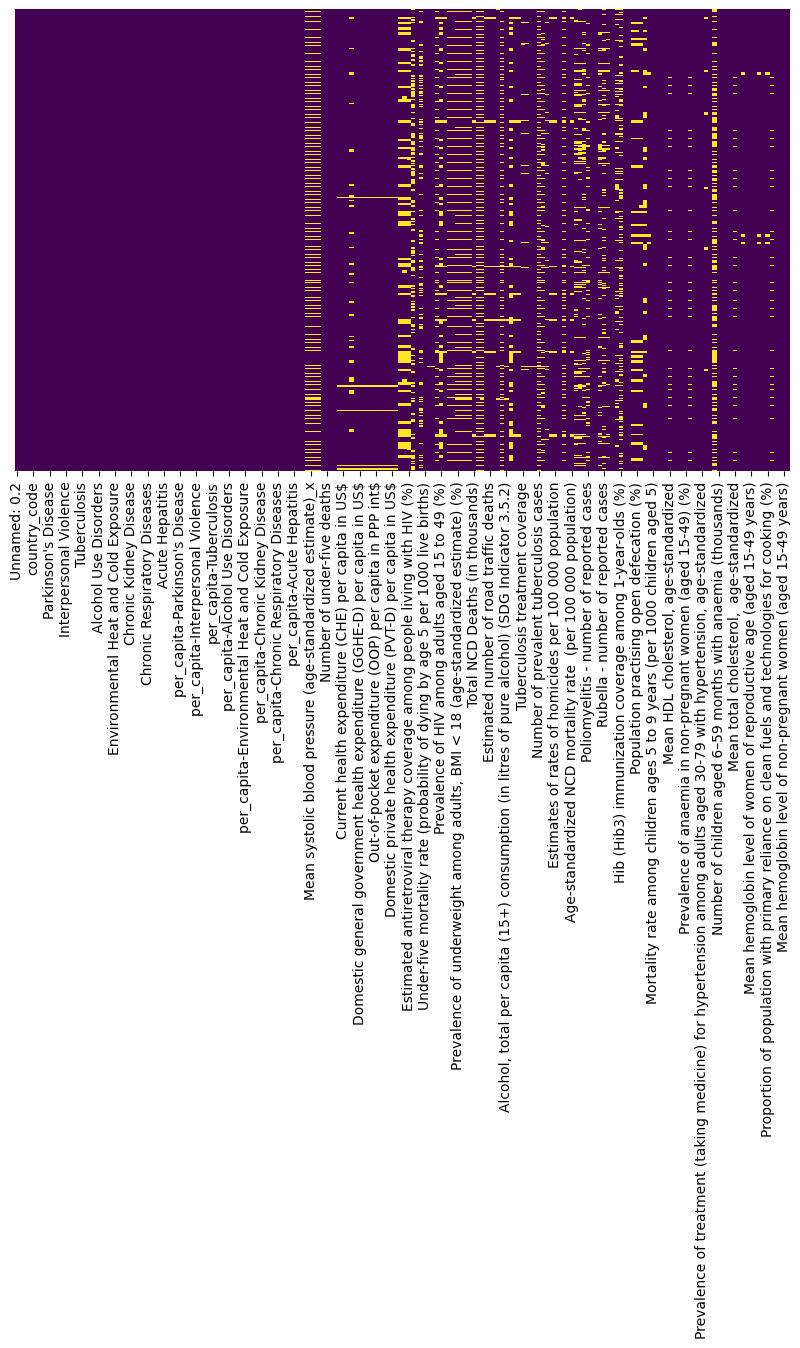

In [202]:
check_nan(data)

In [264]:
data[data.num_nan<=30]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,country,country_code,year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,...,Mean hemoglobin level of women of reproductive age (aged 15-49 years),Number of deaths among children ages 5 to 9 years,Population with primary reliance on clean fuels and technologies for cooking (in millions),Mortality rate among children ages 10 to 14 years (per 1000 children aged 10),Proportion of population with primary reliance on clean fuels and technologies for cooking (%),"Mean Non-HDL cholesterol, age-standardized",Number of non-pregnant women (aged 15-49 years) with anaemia (thousands),Prevalence of anaemia in pregnant women (aged 15-49) (%),Mean hemoglobin level of non-pregnant women (aged 15-49 years),num_nan
2,2,2,2,Afghanistan,AFG,2002,2990.0,1311.0,429.0,2795.0,...,123.0,4420.0,1829.98686,4.67688,37.4,3.1,1360.0,43.4,125.0,6
3,3,3,3,Afghanistan,AFG,2003,3300.0,1326.0,434.0,3039.0,...,123.0,4532.0,2155.11938,4.55469,41.8,3.1,1440.0,42.9,124.0,7
4,4,4,4,Afghanistan,AFG,2004,3350.0,1344.0,439.0,3033.0,...,123.0,4676.0,2534.34922,4.47444,46.7,3.1,1530.0,42.4,124.0,5
5,5,5,5,Afghanistan,AFG,2005,3238.0,1362.0,442.0,2879.0,...,123.0,4821.0,2908.52820,4.43099,51.1,3.1,1620.0,41.9,124.0,5
6,6,6,6,Afghanistan,AFG,2006,3098.0,1381.0,446.0,2727.0,...,123.0,5047.0,3315.69620,4.44194,55.9,3.1,1690.0,41.4,124.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,3574,3574,3574,Zimbabwe,ZWE,2014,1422.0,741.0,212.0,2977.0,...,126.0,2363.0,3992.49260,8.32632,79.7,2.9,941.0,32.7,127.0,1
3575,3575,3575,3575,Zimbabwe,ZWE,2015,1439.0,754.0,215.0,3019.0,...,126.0,2229.0,4067.15006,8.60679,79.6,2.9,950.0,32.4,127.0,5
3576,3576,3576,3576,Zimbabwe,ZWE,2016,1457.0,767.0,219.0,3056.0,...,126.0,2094.0,4136.20394,8.84993,79.3,2.9,959.0,32.2,127.0,9
3577,3577,3577,3577,Zimbabwe,ZWE,2017,1460.0,781.0,223.0,2990.0,...,126.0,1997.0,4225.71144,8.99209,79.3,2.8,971.0,32.0,127.0,14


In [231]:
nan_cols[nan_cols>0]

Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_x                             19.293163
Mean systolic blood pressure (age-standardized estimate)_x                                            19.293163
Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_y                             19.293163
Mean systolic blood pressure (age-standardized estimate)_y                                            19.293163
Current health expenditure (CHE) per capita in PPP int$                                                1.361530
                                                                                                        ...    
Mean total cholesterol,  age-standardized                                                              4.287370
Proportion of population with primary reliance on polluting fuels and technologies for cooking (%)     1.593279
Population with primary reliance on clean fuels and technologies for cooking (in millions)             1

In [223]:
nan_cols[nan_cols>10].index

Index(['Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_x',
       'Mean systolic blood pressure (age-standardized estimate)_x',
       'Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_y',
       'Mean systolic blood pressure (age-standardized estimate)_y',
       'External health expenditure (EXT) per capita in PPP int$',
       'Maternal mortality ratio (per 100 000 live births)',
       'Prevalence of underweight among adults, BMI < 18 (age-standardized estimate) (%)',
       'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (age-standardized estimate) (%)',
       'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)',
       'Mean BMI (kg/m²) (age-standardized estimate)',
       'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)_y',
       'Tuberculosis effective treatment coverage (%)',
       'Adult mortality rate (probability of dying between 15 and 60 years

In [227]:
data.drop(columns = nan_cols[nan_cols>10].index, inplace=True)

In [228]:
data.shape

(3452, 154)

'N nan cols: 46'

Current health expenditure (CHE) per capita in PPP int$                                                                                                1.361530
Current health expenditure (CHE) per capita in US$                                                                                                     1.361530
Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)                                                                     1.361530
Domestic general government health expenditure (GGHE-D) per capita in PPP int$                                                                         1.361530
Domestic general government health expenditure (GGHE-D) per capita in US$                                                                              1.361530
Domestic general government health expenditure (GGHE-D) as percentage of current health expenditure (CHE) (%)                                          1.361530
Domestic general government health expen

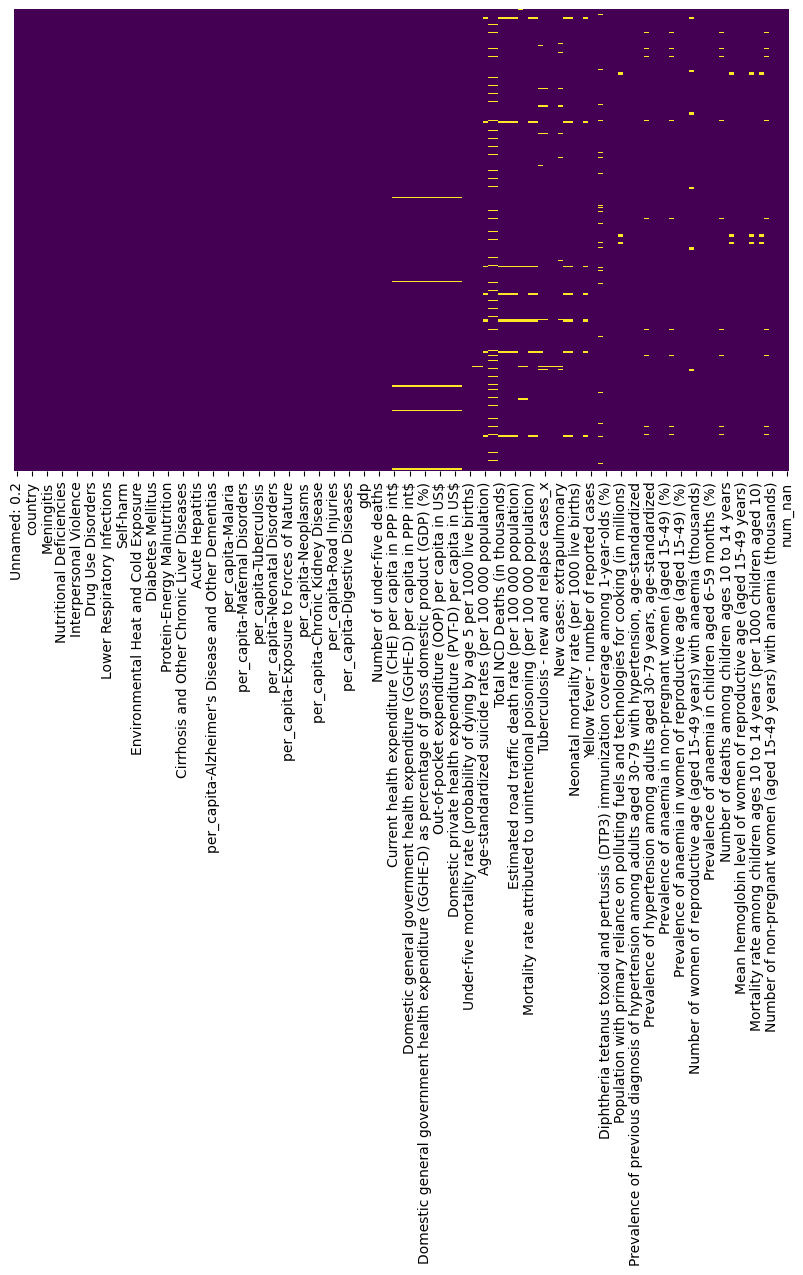

In [229]:
check_nan(data)

In [230]:
data[data["num_nan"]>=10]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,country,country_code,year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,...,Mean hemoglobin level of women of reproductive age (aged 15-49 years),Number of deaths among children ages 5 to 9 years,Population with primary reliance on clean fuels and technologies for cooking (in millions),Mortality rate among children ages 10 to 14 years (per 1000 children aged 10),Proportion of population with primary reliance on clean fuels and technologies for cooking (%),"Mean Non-HDL cholesterol, age-standardized",Number of non-pregnant women (aged 15-49 years) with anaemia (thousands),Prevalence of anaemia in pregnant women (aged 15-49) (%),Mean hemoglobin level of non-pregnant women (aged 15-49 years),num_nan
0,0,0,0,Afghanistan,AFG,2000,3105.0,1291.0,416.0,3060.0,...,123.0,4365.0,1277.64922,5.05169,28.8,3.1,1240.0,44.4,125.0,23
1,1,1,1,Afghanistan,AFG,2001,3063.0,1300.0,424.0,2973.0,...,123.0,4357.0,1533.88587,4.84427,33.0,3.1,1290.0,43.9,125.0,24
16,16,16,16,Afghanistan,AFG,2016,1795.0,1690.0,524.0,1452.0,...,121.0,3856.0,6910.73838,2.68362,79.7,3.1,2940.0,37.1,122.0,11
17,17,17,17,Afghanistan,AFG,2017,1665.0,1728.0,537.0,1367.0,...,121.0,3672.0,7257.92085,2.53144,80.9,3.1,3130.0,36.9,122.0,16
18,18,18,18,Afghanistan,AFG,2018,1576.0,1757.0,551.0,1279.0,...,121.0,3501.0,7567.01443,2.40851,81.6,3.1,3320.0,36.7,121.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,3568,3568,3568,Zimbabwe,ZWE,2008,1720.0,728.0,215.0,2556.0,...,125.0,2892.0,3735.73144,7.35248,82.1,2.9,947.0,34.2,126.0,16
3569,3569,3569,3569,Zimbabwe,ZWE,2009,1751.0,726.0,215.0,2651.0,...,125.0,2846.0,3775.33611,7.45164,81.9,2.9,940.0,34.1,126.0,16
3577,3577,3577,3577,Zimbabwe,ZWE,2017,1460.0,781.0,223.0,2990.0,...,126.0,1997.0,4225.71144,8.99209,79.3,2.8,971.0,32.0,127.0,14
3578,3578,3578,3578,Zimbabwe,ZWE,2018,1450.0,795.0,227.0,2918.0,...,126.0,1921.0,4308.98278,9.06009,79.1,2.8,989.0,31.8,127.0,19


In [262]:
nan_cols=data.isna().mean() * 100

In [263]:
nan_cols[nan_cols>=2]

Number of deaths                                                                                                                                       5.208003
Deaths per 1 000 live births                                                                                                                           5.208003
New cases: extrapulmonary                                                                                                                              2.540489
Measles - number of reported cases                                                                                                                     4.604636
Women of reproductive age (15−49 years) who are married or in-union who have their need for family planning satisfied with modern methods (%), UNPD    3.016831
dtype: float64

In [244]:
data[data["Estimated number of road traffic deaths"].isna()==True].index

Int64Index([  60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
            ...
            3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315],
           dtype='int64', length=108)

In [245]:
data.drop(data[data["Estimated number of road traffic deaths"].isna()==True].index, axis=0, inplace=True)

In [246]:
data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,country,country_code,year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,...,Mean hemoglobin level of women of reproductive age (aged 15-49 years),Number of deaths among children ages 5 to 9 years,Population with primary reliance on clean fuels and technologies for cooking (in millions),Mortality rate among children ages 10 to 14 years (per 1000 children aged 10),Proportion of population with primary reliance on clean fuels and technologies for cooking (%),"Mean Non-HDL cholesterol, age-standardized",Number of non-pregnant women (aged 15-49 years) with anaemia (thousands),Prevalence of anaemia in pregnant women (aged 15-49) (%),Mean hemoglobin level of non-pregnant women (aged 15-49 years),num_nan
0,0,0,0,Afghanistan,AFG,2000,3105.0,1291.0,416.0,3060.0,...,123.0,4365.0,1277.64922,5.05169,28.8,3.1,1240.0,44.4,125.0,23
1,1,1,1,Afghanistan,AFG,2001,3063.0,1300.0,424.0,2973.0,...,123.0,4357.0,1533.88587,4.84427,33.0,3.1,1290.0,43.9,125.0,24
2,2,2,2,Afghanistan,AFG,2002,2990.0,1311.0,429.0,2795.0,...,123.0,4420.0,1829.98686,4.67688,37.4,3.1,1360.0,43.4,125.0,6
3,3,3,3,Afghanistan,AFG,2003,3300.0,1326.0,434.0,3039.0,...,123.0,4532.0,2155.11938,4.55469,41.8,3.1,1440.0,42.9,124.0,7
4,4,4,4,Afghanistan,AFG,2004,3350.0,1344.0,439.0,3033.0,...,123.0,4676.0,2534.34922,4.47444,46.7,3.1,1530.0,42.4,124.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,3575,3575,3575,Zimbabwe,ZWE,2015,1439.0,754.0,215.0,3019.0,...,126.0,2229.0,4067.15006,8.60679,79.6,2.9,950.0,32.4,127.0,5
3576,3576,3576,3576,Zimbabwe,ZWE,2016,1457.0,767.0,219.0,3056.0,...,126.0,2094.0,4136.20394,8.84993,79.3,2.9,959.0,32.2,127.0,9
3577,3577,3577,3577,Zimbabwe,ZWE,2017,1460.0,781.0,223.0,2990.0,...,126.0,1997.0,4225.71144,8.99209,79.3,2.8,971.0,32.0,127.0,14
3578,3578,3578,3578,Zimbabwe,ZWE,2018,1450.0,795.0,227.0,2918.0,...,126.0,1921.0,4308.98278,9.06009,79.1,2.8,989.0,31.8,127.0,19


In [252]:
data[data["Mean HDL cholesterol, age-standardized"].isna()==True]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,country,country_code,year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,...,Mean hemoglobin level of women of reproductive age (aged 15-49 years),Number of deaths among children ages 5 to 9 years,Population with primary reliance on clean fuels and technologies for cooking (in millions),Mortality rate among children ages 10 to 14 years (per 1000 children aged 10),Proportion of population with primary reliance on clean fuels and technologies for cooking (%),"Mean Non-HDL cholesterol, age-standardized",Number of non-pregnant women (aged 15-49 years) with anaemia (thousands),Prevalence of anaemia in pregnant women (aged 15-49) (%),Mean hemoglobin level of non-pregnant women (aged 15-49 years),num_nan
19,19,19,19,Afghanistan,AFG,2019,1563.0,1775.0,560.0,1244.0,...,120.0,3348.0,7886.50038,2.31670,82.3,NaN,3530.0,36.5,121.0,27
59,59,59,59,Algeria,DZA,2019,292.0,5209.0,1283.0,114.0,...,124.0,1522.0,31236.43100,1.64634,100.0,NaN,3430.0,33.1,124.0,28
99,99,99,99,Angola,AGO,2019,2520.0,1143.0,267.0,3015.0,...,120.0,10177.0,16386.99726,6.61655,77.9,NaN,2870.0,48.3,121.0,27
139,139,139,139,Argentina,ARG,2019,453.0,12045.0,3043.0,1330.0,...,132.0,605.0,41448.07643,1.07791,99.9,NaN,1250.0,20.6,133.0,24
159,159,159,159,Armenia,ARM,2019,5.0,873.0,169.0,4.0,...,130.0,43.0,1849.11583,0.97059,99.6,NaN,125.0,18.1,131.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,3479,3479,3479,Vanuatu,VUT,2019,6.0,19.0,13.0,12.0,...,126.0,23.0,16.52941,2.42099,22.6,NaN,19.5,27.7,127.0,31
3499,3499,3499,3499,Venezuela,VEN,2019,254.0,6313.0,1119.0,552.0,...,127.0,833.0,28577.77057,2.06105,98.8,NaN,1680.0,26.4,128.0,28
3519,3519,3519,3519,Vietnam,VNM,2019,747.0,19460.0,4259.0,954.0,...,129.0,1620.0,29477.23898,1.67447,82.6,NaN,4980.0,28.4,129.0,23
3559,3559,3559,3559,Zambia,ZMB,2019,2065.0,763.0,203.0,1899.0,...,125.0,3783.0,1798.53435,4.40931,22.5,NaN,1210.0,39.3,126.0,27


In [253]:
data.drop(data[data["Mean HDL cholesterol, age-standardized"].isna()==True].index, axis=0, inplace=True)

In [258]:
data.drop(data[data["Current health expenditure (CHE) per capita in PPP int$"].isna()==True].index, axis=0, inplace=True)

In [272]:
data.drop(data[data.num_nan>=6].index, axis=0, inplace=True)

In [276]:
data.drop(data[data["Number of deaths"].isna()==True].index, axis=0, inplace=True)

'N nan cols: 9'

Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)_x                                                                           0.906649
Tuberculosis - new and relapse cases_x                                                                                                                 1.477502
New cases: extrapulmonary                                                                                                                              2.417730
Measles - number of reported cases                                                                                                                     4.768301
Polio (Pol3) immunization coverage among 1-year-olds (%)                                                                                               0.067159
Population with primary reliance on polluting fuels and technologies for cooking (in millions)                                                         1.544661
Women of reproductive age (15−49 years) 

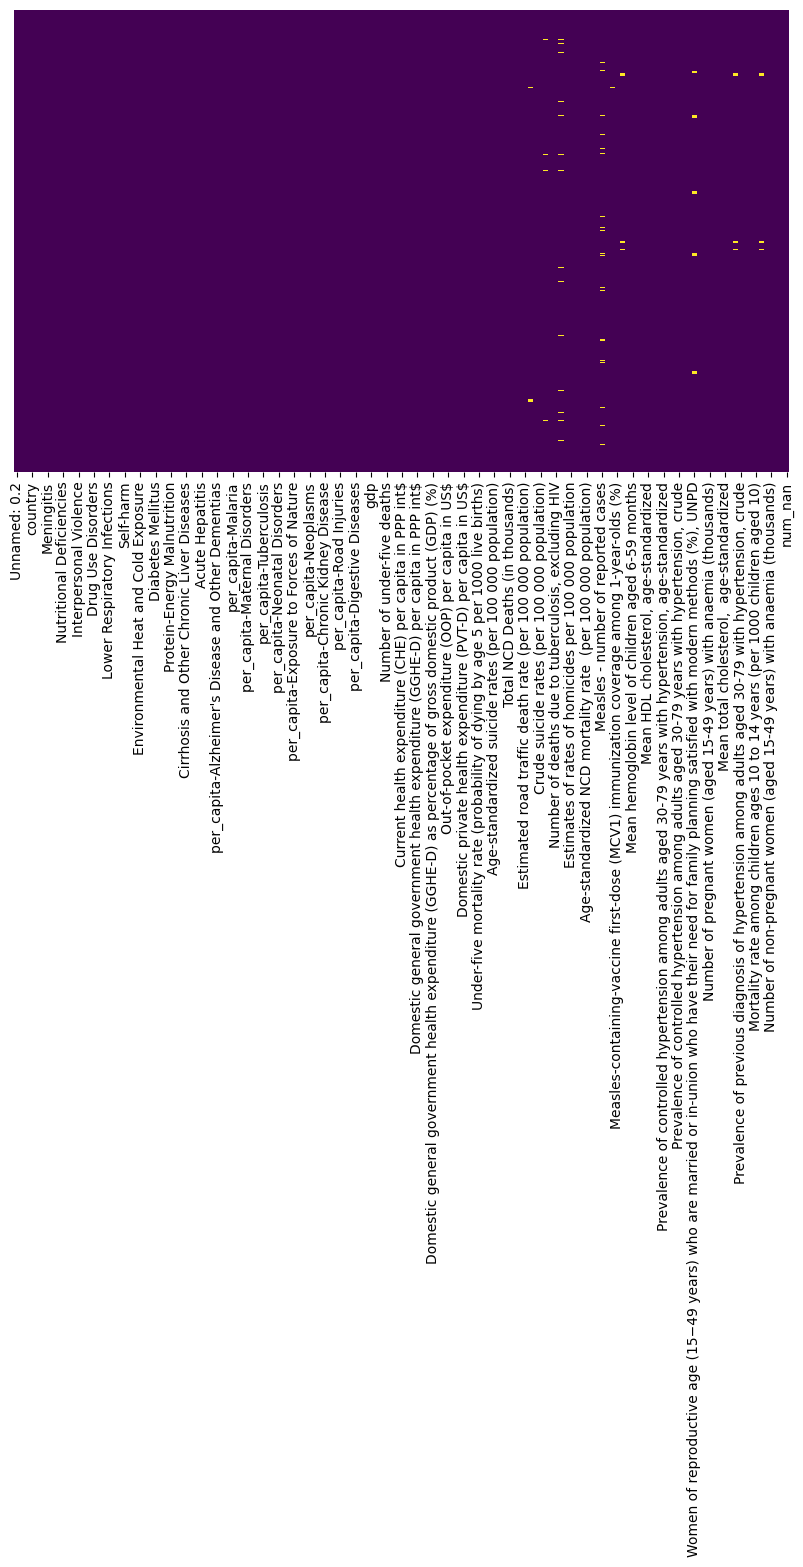

In [298]:
check_nan(data)

In [302]:
data[data["Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)_x"].isna()==True]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,country,country_code,year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,...,"Prevalence of previous diagnosis of hypertension among adults aged 30-79 with hypertension, crude",Mean hemoglobin level of women of reproductive age (aged 15-49 years),Number of deaths among children ages 5 to 9 years,Mortality rate among children ages 10 to 14 years (per 1000 children aged 10),Proportion of population with primary reliance on clean fuels and technologies for cooking (%),"Mean Non-HDL cholesterol, age-standardized",Number of non-pregnant women (aged 15-49 years) with anaemia (thousands),Prevalence of anaemia in pregnant women (aged 15-49) (%),Mean hemoglobin level of non-pregnant women (aged 15-49 years),num_nan
2,2,2,2,Afghanistan,AFG,2002,2990.0,1311.0,429.0,2795.0,...,28.2,123.0,4420.0,4.67688,37.4,3.1,1360.0,43.4,125.0,1
3,3,3,3,Afghanistan,AFG,2003,3300.0,1326.0,434.0,3039.0,...,28.9,123.0,4532.0,4.55469,41.8,3.1,1440.0,42.9,124.0,1
4,4,4,4,Afghanistan,AFG,2004,3350.0,1344.0,439.0,3033.0,...,29.6,123.0,4676.0,4.47444,46.7,3.1,1530.0,42.4,124.0,1
580,580,580,580,Canada,CAN,2000,113.0,8587.0,2339.0,318.0,...,67.2,133.0,263.0,0.78763,100.0,3.8,703.0,15.7,133.0,2
581,581,581,581,Canada,CAN,2001,116.0,8938.0,2444.0,329.0,...,68.7,133.0,251.0,0.76110,100.0,3.8,690.0,15.3,133.0,2
582,582,582,582,Canada,CAN,2002,109.0,9294.0,2565.0,339.0,...,70.1,133.0,239.0,0.73665,100.0,3.7,683.0,15.1,133.0,1
583,583,583,583,Canada,CAN,2003,110.0,9590.0,2658.0,342.0,...,71.4,133.0,225.0,0.71475,100.0,3.7,679.0,14.9,133.0,1
584,584,584,584,Canada,CAN,2004,100.0,9893.0,2732.0,341.0,...,72.7,133.0,212.0,0.69519,100.0,3.7,677.0,14.8,133.0,1
2765,2765,2765,2765,Serbia,SRB,2005,43.0,1836.0,707.0,17.0,...,50.3,128.0,98.0,0.94750,84.4,4.1,485.0,27.0,129.0,2
3000,3000,3000,3000,Sudan,SDN,2000,2323.0,1865.0,474.0,3295.0,...,14.0,120.0,9838.0,5.92512,18.1,2.8,2430.0,42.5,121.0,2


In [292]:
data["Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)_x"]

2           NaN
3           NaN
4           NaN
5       0.00084
6       0.00786
         ...   
3573    4.11000
3574    4.22000
3575    3.84000
3576    3.76000
3577    3.82000
Name: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)_x, Length: 2978, dtype: float64

In [290]:
data.drop(columns =["Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)"], inplace=True)

In [294]:
data.drop(columns =["Population with primary reliance on clean fuels and technologies for cooking (in millions)"], inplace=True)

In [297]:
data.drop(columns =["Tuberculosis treatment coverage"], inplace=True)

In [299]:
data.drop(columns =["Tuberculosis - new and relapse cases_x"], inplace=True)

In [303]:
df = data.groupby(by="country").mean()["Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)_x"]

C:\Users\pabli\AppData\Local\Temp\ipykernel_4976\1098878649.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()["Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)_x"]


In [306]:
df

country
Afghanistan            0.007574
Albania                2.440667
Algeria                0.305667
Angola                 3.683418
Antigua and Barbuda    4.811789
                         ...   
Venezuela              2.792437
Vietnam                1.233681
Yemen                  0.015000
Zambia                 1.610642
Zimbabwe               3.871250
Name: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)_x, Length: 168, dtype: float64

In [309]:
data[data.num_nan>=3].index

Int64Index([ 104,  115,  188,  234,  235,  263,  265,  480,  481,  482,  483,
             484,  485,  486,  487,  488,  489,  490,  491,  492,  493,  494,
             495,  496,  497,  600,  620,  627,  640,  641,  646,  727,  730,
             735,  781,  940,  941,  942,  943,  945,  946,  947,  952,  953,
            1080, 1181, 1185, 1193, 1241, 1247, 1494, 1700, 1701, 1702, 1703,
            1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714,
            1715, 1716, 1717, 1747, 1760, 1762, 1763, 1764, 1765, 1766, 1767,
            1768, 1769, 1771, 1820, 1961, 1962, 1963, 2553, 2687, 2786, 2787,
            3027, 3181, 3344],
           dtype='int64')